# Assignment 1 - 13
## Exploratory Data Analysis

Netid:  xy93

Name: Xuan Yu

Here you'll bring together some of the individual skills that you demonstrated above and create a Jupyter notebook based blog post on data analysis.

1. Find a dataset that interests you and relates to a question or problem that you find intriguing
2. Using a Jupyter notebook, describe the dataset, the source of the data, and the reason the dataset was of interest.
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized.
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this as if your target audience was the readership of a major news organization - boil down your findings in a way that is accessible, but still accurate.
5. Create a public repository on your github account titled "machine-learning-course". In it, create a readme file that contains the heading "ECE590: Introductory Machine Learning for Data Science". Add, commit, and push that Jupyter notebook to the master branch. Provide the link to the that post here.


## 1
### Main Questions: 

Does different time period in one year have any impact on Walmart store weekly sales? Do other variables also matter or not? Can we predict the next year's Walmart store sales in a specific week when other variables are given?

## 2
### Source
Some parts of the Kaggle data: Walmart Store Sales Forecasting

### Data Description
Historical real world sales data of 45 Walmart stores located in different regions.

#### Date
Every week in each year.

#### Store
The Walmart store number. I pick store 19 department 1 as our modeling and testing dataset.

#### Fuel_Price
The cost of fuel in the region.

#### CPI
The consumer price index variable.

#### Unemployment
The unemployment rate in the region.

#### IsHoliday
Whether the week is a special holiday week.
1 - This week is a holiday week.
0 - This week is not a holiday week.

#### Weekly_Sales
The weekly sales for department 1 in store 19.

#### Week
Numerical count of the weeks, created by myself using date variable.

### Why interesting
It is a great real world dataset for predicting. The result may also be interesting.

## 3
### Missing Values:
Most values in all the Markdown variables are missing, so I drop all markdown variables.
### Tables
Yes, two tables need to be joined together. I joined them and wrote them as a new csv file called "final_data".

## 4
### EDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
store19 = pd.read_csv("/Users/xuanyu/Desktop/MIDS courses/data_modeling/final project/models/final_data.csv", index_col=None, na_values=['NA'])
store19 = store19.drop(columns="Unnamed: 0")
store19.loc[store19.IsHoliday == "FALSE", "IsHoliday"] = False
store19.loc[store19.IsHoliday == " TRUE", "IsHoliday"] = True
store19.head()

,Date,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
0,2010-02-05,19,20.96,2.954,131.5279,8.35,False,21500.58
1,2010-02-12,19,23.22,2.940,131.5866,8.35,True,40188.68
2,2010-02-19,19,28.57,2.909,131.6370,8.35,False,32365.74
3,2010-02-26,19,30.33,2.910,131.6860,8.35,False,15770.97
4,2010-03-05,19,32.92,2.919,131.7350,8.35,False,18293.70


I first loaded in the data. The IsHoliday variable was in string format, so I changed them to boolean True and False. Then I took a look at the data.

### Scatter plots and box plots

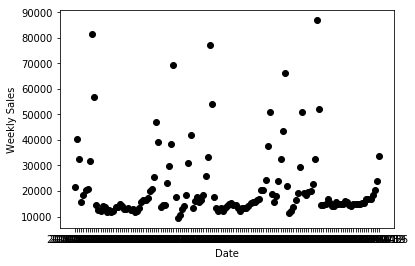

In [2]:
plt.plot(store19.Date, store19.Weekly_Sales, 'ko')
plt.ylabel("Weekly Sales")
plt.xlabel("Date")
plt.show()

The Weekly_Sales variable appears to have a periodic trend when plotted with Date variable. I may need be careful when handling with this situation later. 

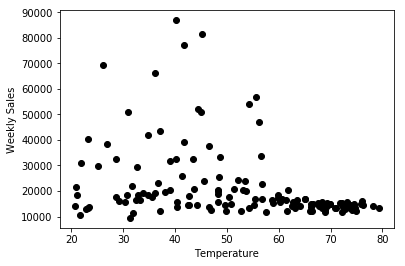

In [3]:
plt.plot(store19.Temperature, store19.Weekly_Sales, 'ko')
plt.ylabel("Weekly Sales")
plt.xlabel("Temperature")
plt.show()

The Weekly_Sales versus Temperature plot seems to have a fan-out trend. We may need a log transformation later.

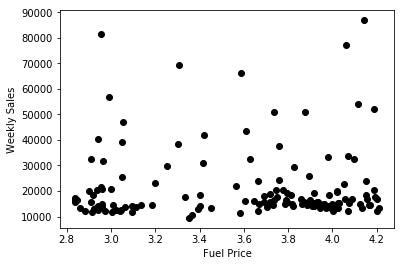

In [4]:
plt.plot(store19.Fuel_Price, store19.Weekly_Sales, 'ko')
plt.ylabel("Weekly Sales")
plt.xlabel("Fuel Price")
plt.show()

I didn't find significant trend here.

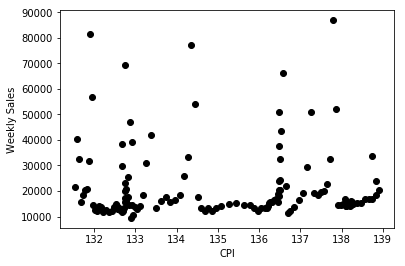

In [5]:
plt.plot(store19.CPI, store19.Weekly_Sales, 'ko')
plt.ylabel("Weekly Sales")
plt.xlabel("CPI")
plt.show()

Weekly_sales versus CPI plot shows the same pattern with Weekly_sales versus Date plot, we may suspect that CPI and Date variable has some correlations. We can plot them to check our assumption.

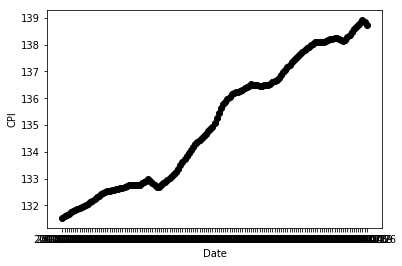

In [6]:
plt.plot(store19.Date, store19.CPI, 'ko')
plt.ylabel("CPI")
plt.xlabel("Date")
plt.show()

It seems that the CPI and Date variable are highly correlated. This may harm the model so we may need to remove one of them later.

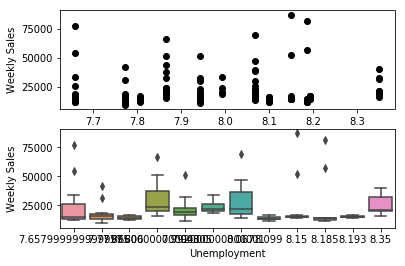

In [7]:
plt.subplot(211)
plt.plot(store19.Unemployment, store19.Weekly_Sales, 'ko')
plt.ylabel("Weekly Sales")
plt.xlabel("Unemployment")
plt.subplot(212)
import seaborn as sns
sns.boxplot(x = "Unemployment", y = "Weekly_Sales", data = store19)
plt.ylabel("Weekly Sales")
plt.xlabel("Unemployment")
plt.show()
plt.show()

There is some changes of medians in Weekly_Sales but right now I didn't find it reasonable. I may look at it later.

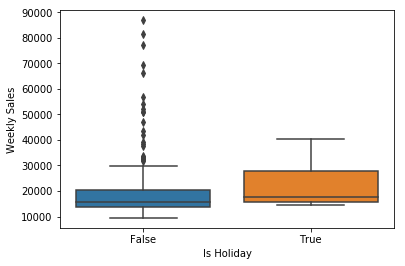

In [8]:
sns.boxplot(x = "IsHoliday", y = "Weekly_Sales", data = store19)
plt.ylabel("Weekly Sales")
plt.xlabel("Is Holiday")
plt.show()

The boxplot shows that Walmart may have higher weekly sales in holiday weeks, but non-holiday weeks also contain a lot of outliers, so we cannot make definate conclusion using this plot.

### Histograms

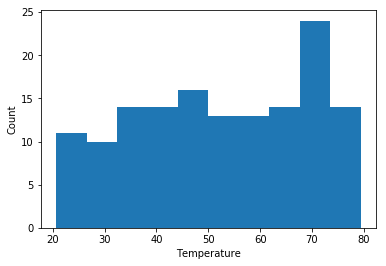

In [9]:
plt.hist(store19.Temperature)
plt.ylabel("Count")
plt.xlabel("Temperature")
plt.show()

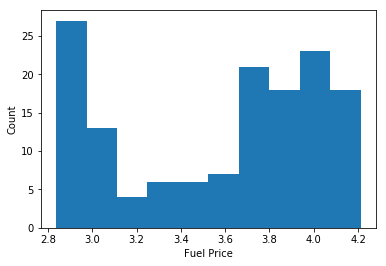

In [10]:
plt.hist(store19.Fuel_Price)
plt.ylabel("Count")
plt.xlabel("Fuel Price")
plt.show()

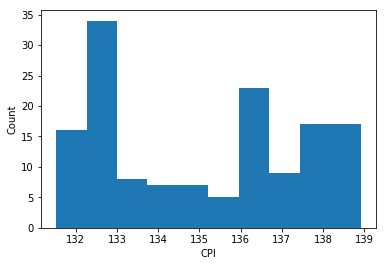

In [11]:
plt.hist(store19.CPI)
plt.ylabel("Count")
plt.xlabel("CPI")
plt.show()

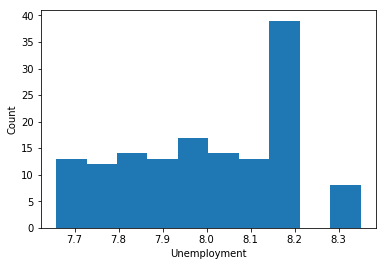

In [12]:
plt.hist(store19.Unemployment)
plt.ylabel("Count")
plt.xlabel("Unemployment")
plt.show()

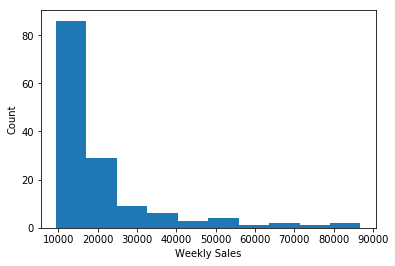

In [13]:
plt.hist(store19.Weekly_Sales)
plt.ylabel("Count")
plt.xlabel("Weekly Sales")
plt.show()

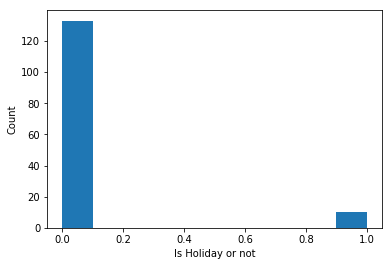

In [14]:
plt.hist(store19.IsHoliday)
plt.ylabel("Count")
plt.xlabel("Is Holiday or not")
plt.show()

Most of the variables are not nicely distributed. And some of them are really skewed. I need to keep that in mind when doing further modeling.

## 5
### Interesting Parts
1. I found that CPI variable is highly correlated with Week variable, so I may need to remove it from my model. 
2. I also worry about IsHoliday and CPI variable because it's really skewed.
3. In the exploratory plots, it seems to have a periodic trend in the sales versus date plot.
4. Temperature variable seems to have a fan out trend.

### Insights
1. Weekly sales have some really large peaks each year. Some of them may be related to holiday weeks and some special time trend each year, but there are still some outliers with repeating trends. It may be useful to dig deeper to find out what is happening.
2. Weekly sales seems to go down when temperature increases. This is reasonable, but what Walmart may consider doing is to find out what the specific reasons that stop people buying things when temperature goes up and try to improve the condition as they can to get more sales.
3. I need models and more data to further explore the dataset, but I should be aware of all those interesting parts we found, and take good care of them in case they do harm to the models.